# Simple ML

### Results:

#### Bat
RMSE

No Pitching stats: 9.5

With Pitching stats: 1.9


In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys

%matplotlib inline

np.set_printoptions(threshold = 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Load Data

In [4]:
bat = pd.read_csv(r'..\Data_Pull\data_files\Simple_ML_files\bat_ml_one.csv', index_col='Unnamed: 0', parse_dates = ['Date'])
pitch = pd.read_csv(r'..\Data_Pull\data_files\Simple_ML_files\pitch_ml_one.csv', index_col='Unnamed: 0', parse_dates = ['Date'])

#combined = pd.read_csv(r'..\Data_Pull\data_files\Simple_ML_files\combined_ml.csv', index_col='Unnamed: 0', parse_dates = ['Date'])
combined = pd.read_csv(r'..\Data_Pull\data_files\Simple_ML_files\combined_ml_163_only.csv', index_col='Unnamed: 0', parse_dates = ['Date'])

In [5]:
combined.head()

,Date,Team,Opp,BO,Pos,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,pid,Home/Away,Teams,BO_163,G_163,AB_163,PA_163,H_163,1B_163,2B_163,3B_163,HR_163,R_163,RBI_163,BB_163,IBB_163,SO_163,HBP_163,SF_163,SH_163,GDP_163,SB_163,Age,Birthdate,Name,POS,Bats,Throws,Height,Weight,Date_pitch,Team_pitch,Opp_pitch,GS_pitch,W_pitch,L_pitch,SV_pitch,HLD_pitch,IP_pitch,TBF_pitch,H_pitch,R_pitch,ER_pitch,HR_pitch,BB_pitch,SO_pitch,K/9_pitch,BB/9_pitch,HR/9_pitch,BABIP_pitch,LOB%_pitch,GB%_pitch,HR/FB_pitch,ERA_pitch,FIP_pitch,xFIP_pitch,GSv2_pitch,pid_pitch,Home/Away_pitch,Teams_pitch,GS_163_pitch,W_163_pitch,L_163_pitch,SV_163_pitch,HLD_163_pitch,IP_163_pitch,TBF_163_pitch,H_163_pitch,R_163_pitch,ER_163_pitch,HR_163_pitch,BB_163_pitch,SO_163_pitch,QS_pitch,QS_163_pitch
0,2017-08-10,KCR,STL,9,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Away,KCR_STL,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10692.0,1988-05-02,Neftali Feliz,P,R,R,75.0,235.0,2017-08-10,STL,KCR,1.0,0.0,0.0,0.0,0.0,6.0,27.0,6.0,3.0,2.0,0.0,5.0,3.0,4.50,7.50,0.00,0.316,0.727,0.444,0.000,3.0,4.66,6.73,48.0,2520.0,Home,KCR_STL,23.0,10.0,6.0,0.0,0.0,130.8,541.0,99.0,52.0,46.0,22.0,49.0,114.0,1.0,13.0
1,2017-08-08,KCR,STL,0,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Home,KCR_STL,4.50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10690.0,1988-05-02,Neftali Feliz,P,R,R,75.0,235.0,2017-08-08,STL,KCR,1.0,1.0,0.0,0.0,0.0,6.0,25.0,6.0,3.0,3.0,0.0,2.0,5.0,7.50,3.00,0.00,0.333,0.625,0.278,0.000,4.5,2.49,5.46,56.0,14078.0,Away,KCR_STL,20.0,8.0,4.0,0.0,0.0,109.5,461.0,108.0,50.0,45.0,11.0,36.0,110.0,1.0,11.0
2,2017-08-04,KCR,SEA,0,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Home,KCR_SEA,2.25,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10686.0,1988-05-02,Neftali Feliz,P,R,R,75.0,235.0,2017-08-04,SEA,KCR,1.0,1.0,0.0,0.0,0.0,6.0,23.0,4.0,2.0,2.0,0.0,1.0,7.0,10.50,1.50,0.00,0.267,0.600,0.667,0.000,3.0,1.32,1.62,68.0,11828.0,Away,KCR_SEA,18.0,11.0,3.0,0.0,0.0,105.7,435.0,87.0,34.0,32.0,5.0,31.0,125.0,1.0,11.0
3,2017-08-01,KCR,BAL,0,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Away,BAL_KCR,1.80,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10683.0,1988-05-02,Neftali Feliz,P,R,R,75.0,235.0,2017-08-01,BAL,KCR,1.0,1.0,0.0,0.0,0.0,8.0,28.0,3.0,1.0,0.0,0.0,1.0,5.0,5.63,1.13,0.00,0.136,0.750,0.455,0.000,0.0,2.28,4.28,83.0,12917.0,Home,BAL_KCR,20.0,9.0,8.0,0.0,0.0,118.4,495.0,112.0,61.0,60.0,21.0,39.0,92.0,1.0,13.0
4,2017-07-29,KCR,BOS,0,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Away,BOS_KCR,1.50,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10680.0,1988-05-02,Neftali Feliz,P,R,R,75.0,235.0,2017-07-29,BOS,KCR,1.0,0.0,0.0,0.0,0.0,4.0,22.0,7.0,4.0,4.0,1.0,3.0,5.0,11.25,6.75,2.25,0.462,0.698,0.143,0.167,9.0,6.16,5.58,32.0,13164.0,Home,BOS_KCR,12.0,4.0,3.0,0.0,0.0,69.5,295.0,61.0,32.0,31.0,11.0,27.0,77.0,0.0,7.0


In [6]:
combined = combined.loc[combined['AB'] > 0]
combined.dropna(inplace= True)

### Add Points for Dependent Var

In [7]:
hit_scoring = {'1B' : 3, '2B' : 6, '3B' : 9, 'HR' : 12, 'RBI' : 3.5, 'R' : 3.2, 'BB' : 3, 'SB' : 6, 'HBP' : 3}
pitch_scoring = {'W_pitch' : 6, 'QS_pitch' : 4, 'ER_pitch' : -3, 'SO_pitch' : 3, 'IP_pitch' : 3}

In [8]:
combined_points = combined.loc[:, ['1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'SB', 'HBP']].assign(**hit_scoring).mul(combined.loc[:, ['1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'SB', 'HBP']]).sum(1)
combined.loc[:, 'Bat_Points'] = combined_points

In [9]:
combined_pitch_points = combined.loc[:, ['W_pitch', 'QS_pitch', 'ER_pitch', 'SO_pitch', 'IP_pitch']].assign(**pitch_scoring).mul(combined.loc[:, ['W_pitch', 'QS_pitch', 'ER_pitch', 'SO_pitch', 'IP_pitch']]).sum(1)
combined.loc[:, 'Pitch_Points'] = combined_pitch_points

In [116]:
combined= combined.loc[combined['Bat_Points'] != 0]

### Evaluation Function

In [183]:
def eval_reg(fit_model, y_pred, y_test):
    """
    Fucntion to return regression evaluation statistics
    
    Parmeters
    ----------
    fit_model - trained regression model
    y_pred - predicted var
    y_Test - testing dependent var
    """
    
    
    from sklearn.metrics import r2_score
    
    r2 = r2_score(y_test, y_pred)
    
    resid = y_test - y_pred
    sse = sum(resid**2)
    rmse = np.sqrt(np.mean(resid**2))
    
    try:
        k = len(fit_model.coef_)
        AIC= 2*k - 2*np.log(sse)

    except:
        AIC = np.nan
        
    return {'r2' : r2, 'sse' : sse, 'rmse' : rmse, 'AIC' : AIC}
    

### Start ML

In [9]:
combined_train.head()

NameError: name 'combined_train' is not defined

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV

In [11]:
pitch_drop = ['Teams', 'Date_pitch', 'Team_pitch',	'Opp_pitch',	'GS_pitch',	'W_pitch',	'L_pitch',	'SV_pitch',	'HLD_pitch',	'IP_pitch',	'TBF_pitch',	'H_pitch',	'R_pitch',	'ER_pitch',	'HR_pitch',	'BB_pitch',	'SO_pitch',	
             'K/9_pitch',	'BB/9_pitch',	'HR/9_pitch',	'BABIP_pitch',	'LOB%_pitch',	'GB%_pitch',	'HR/FB_pitch',	'ERA_pitch',	'FIP_pitch',	'xFIP_pitch',	'GSv2_pitch',	'pid_pitch',	'Home/Away_pitch',	'Teams_pitch',
             'Pitch_Points']

In [136]:
combined_train = combined.iloc[:, 26:]
combined_train = combined_train.drop(columns = pitch_drop)

NameError: name 'pitch_drop' is not defined

In [137]:
combined.columns[(combined.columns.str.contains('163') | combined.columns.str.contains('Home/Away') | combined.columns.isin(['Bat_Points', 'Age'])) & (~combined.columns.str.contains('Home/Away_pitch'))]

Index(['Home/Away', 'BO_163', 'G_163', 'AB_163', 'PA_163', 'H_163', '1B_163',
       '2B_163', '3B_163', 'HR_163', 'R_163', 'RBI_163', 'BB_163', 'IBB_163',
       'SO_163', 'HBP_163', 'SF_163', 'SH_163', 'GDP_163', 'SB_163', 'Age',
       'GS_163_pitch', 'W_163_pitch', 'L_163_pitch', 'SV_163_pitch',
       'HLD_163_pitch', 'IP_163_pitch', 'TBF_163_pitch', 'H_163_pitch',
       'R_163_pitch', 'ER_163_pitch', 'HR_163_pitch', 'BB_163_pitch',
       'SO_163_pitch', 'QS_163_pitch', 'Bat_Points'],
      dtype='object')

In [189]:
combined_train = combined.loc[:, combined.columns[(combined.columns.str.contains('163') | combined.columns.isin(['Bat_Points', 'Age']) | combined.columns.str.contains('Bat_Points')) & (~combined.columns.str.contains('Home/Away_pitch'))]]

In [190]:
combined_train.dropna(inplace = True)

In [191]:
combined_train.iloc[:, :] = normalize(combined_train.iloc[:, :])

In [192]:
combined_train.head()

,BO_163,G_163,AB_163,PA_163,H_163,1B_163,2B_163,3B_163,HR_163,R_163,RBI_163,BB_163,IBB_163,SO_163,HBP_163,SF_163,SH_163,GDP_163,SB_163,Age,GS_163_pitch,W_163_pitch,L_163_pitch,SV_163_pitch,HLD_163_pitch,IP_163_pitch,TBF_163_pitch,H_163_pitch,R_163_pitch,ER_163_pitch,HR_163_pitch,BB_163_pitch,SO_163_pitch,QS_163_pitch,Bat_Points
156,0.000099,0.003178,0.000873,0.000935,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000436,0.0,0.0,0.000062,0.000062,0.0,0.999973,0.000249,0.000125,0.000000,0.0,0.0,0.001496,0.005983,0.001184,0.000312,0.000187,0.000062,0.000374,0.001371,0.000187,0.000199
162,0.000275,0.000069,0.000069,0.000069,0.000069,0.000069,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.996455,0.003432,0.000480,0.001441,0.0,0.0,0.017572,0.076946,0.017503,0.010845,0.010159,0.003569,0.006864,0.015650,0.001236,0.000206
163,0.000276,0.000138,0.000344,0.000344,0.000138,0.000138,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000069,0.0,0.0,0.000000,0.000000,0.0,0.999946,0.000413,0.000138,0.000207,0.0,0.0,0.002225,0.009506,0.002273,0.001171,0.001171,0.000138,0.000620,0.001584,0.000138,0.001288
164,0.000274,0.000206,0.000686,0.000686,0.000274,0.000137,0.000137,0.0,0.0,0.000069,0.000069,0.0,0.0,0.000069,0.0,0.0,0.000000,0.000000,0.0,0.995482,0.003978,0.001097,0.001235,0.0,0.0,0.019870,0.087244,0.017696,0.011180,0.009739,0.003429,0.008573,0.019205,0.001372,0.000206
165,0.000276,0.000276,0.000965,0.000965,0.000345,0.000207,0.000138,0.0,0.0,0.000069,0.000069,0.0,0.0,0.000138,0.0,0.0,0.000000,0.000000,0.0,0.999998,0.000138,0.000000,0.000069,0.0,0.0,0.000207,0.000827,0.000069,0.000138,0.000138,0.000069,0.000138,0.000138,0.000000,0.000207


In [193]:
#X = combined_train.drop(columns = combined_train.columns[1:17])
X = combined_train.drop(columns = 'Bat_Points')
y = combined_train.loc[:, 'Bat_Points']

In [194]:
X = pd.get_dummies(X)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

#### Lasso

In [157]:
lass_reg = Lasso(alpha = .00000001)

In [91]:
parameters = {'alpha': [.00001, .000001, .0000001, .00000001]}

In [60]:
clf = GridSearchCV(lass_reg, parameters)

In [178]:
lass_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2564146.0235356283, tolerance: 530.7910681326209
  positive)


Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [184]:
eval_reg(lass_reg, lass_reg.predict(X_test), y_test)

{'r2': 0.028121991072365904,
 'sse': 1286528.810598658,
 'rmse': 9.303717592667645,
 'AIC': 39.86508338997796}

In [160]:
lasso_params = np.nonzero(lass_reg.coef_)[0]

In [181]:
X_train.iloc[:, lasso_params].head()

,G_163,1B_163,HR_163,R_163,RBI_163,BB_163,SO_163,SB_163,Age,R_163_pitch,ER_163_pitch,SO_163_pitch
4938,0.004032,0.002130,0.000456,0.001065,0.001902,0.000989,0.002587,0.000000,0.997255,0.007075,0.006314,0.016508
131069,0.001679,0.000105,0.000000,0.000105,0.000000,0.000420,0.000420,0.000105,0.999992,0.000105,0.000105,0.000210
154822,0.016886,0.007252,0.000622,0.004455,0.002901,0.004144,0.009117,0.000104,0.997224,0.001554,0.001140,0.002694
61553,0.002166,0.001213,0.000087,0.001126,0.000866,0.000606,0.001906,0.000000,0.990989,0.014209,0.013169,0.029977
59033,0.014274,0.011735,0.001664,0.008845,0.004816,0.005867,0.009545,0.002277,0.996041,0.001839,0.001839,0.005692


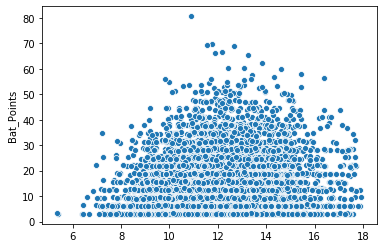

In [185]:
fig, ax = plt.subplots()

sns.scatterplot(lass_reg.predict(X_test), y_test)


#### Rand Forest

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [211]:
x = X_train.loc[:, X_train.columns[]]

ValueError: Either fit the model before transform or set "prefit=True" while passing the fitted estimator to the constructor.

In [210]:
rand_forest = RandomForestRegressor(n_estimators = 100)
rand_forest.fit(, y_train)

ValueError: Either fit the model before transform or set "prefit=True" while passing the fitted estimator to the constructor.

In [208]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

ValueError: Either fit the model before transform or set "prefit=True" while passing the fitted estimator to the constructor.

In [202]:
print(sel.coef_)

print(sel.threshold_)

print(sel.get_support())

AttributeError: 'SelectFromModel' object has no attribute 'coef_'

In [127]:
rf_random = RandomizedSearchCV(estimator = rand_forest, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train.iloc[:, lasso_params], y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
rf_random.best_params_

In [174]:
rand_forest.score(X_test, y_test)

-0.01839744297121282

In [175]:
eval_reg(rand_forest, rand_forest.predict(X_test), y_test)

{'r2': -0.01839744297121282,
 'sse': 1348109.1649229988,
 'rmse': 1161.0810328840096,
 'AIC': nan}

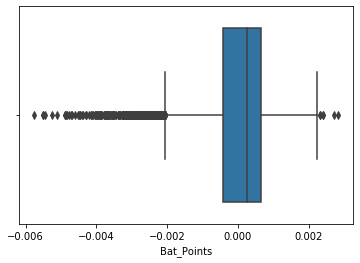

In [197]:
fig, ax = plt.subplots()

sns.boxplot(rand_forest.predict(X_test) - y_test)

## PCA

In [164]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components =3)

In [166]:
principalComponents = pca.fit_transform(X)

In [167]:
pca_X = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

In [168]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 7)

In [172]:
rand_forest = RandomForestRegressor()

In [173]:
rand_forest.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [174]:
rand_forest.score(X_test, y_test)

0.13222355043904133

In [176]:
eval_reg(rand_forest, rand_forest.predict(X_test), y_test)['sse']

104.31774822109163

In [180]:
sse_test = list()

for x in range(3, 60):
    
    pca = PCA(n_components =3)
    principalComponents = pca.fit_transform(X)
    pca_X = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 7)
    rand_forest = RandomForestRegressor()
    
    rand_forest.fit(X_train, y_train)
    evals = eval_reg(rand_forest, rand_forest.predict(X_test), y_test)['sse']
    sse_test.append(evals)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

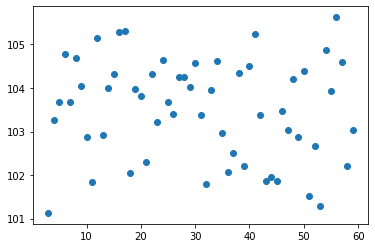

In [181]:
fig, ax = plt.subplots()

ax.scatter(x = range(3,60), y = sse_test)

## Advanced Batter Stats

In [185]:
adv_df = pd.read_csv(r'..\Data_Pull\data_files\reduced_data\batter_advanced_raw_red.csv', index_col='Unnamed: 0', parse_dates = ['Date'])

In [187]:
adv_df.head()

,Date,Team,Opp,BO,Pos,BB%,K%,BB/K,AVG,OBP,SLG,OPS,ISO,Spd,BABIP,wSB,wRC,wRAA,wOBA,wRC+,pid
0,2017-08-13,KCR,@CHW,0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,NaN,18.0
1,2017-08-10,KCR,@STL,9,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,NaN,18.0
2,2017-08-08,KCR,STL,0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,NaN,18.0
3,2017-08-06,KCR,SEA,0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,NaN,18.0
4,2017-08-04,KCR,SEA,0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,NaN,18.0
